This notebook is used to generate the plots in the manuscript regarding the cost scaling of random Hamiltonians.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
import numpy as np
import matplotlib.pyplot as plt
from colors import *
import pandas as pd
plt.rcParams["font.size"] = 10

# Plot Costs as a Function of Number of Terms ($L$) 

In [3]:
dataframe = pd.read_csv("random_operators_numerical_data.csv")

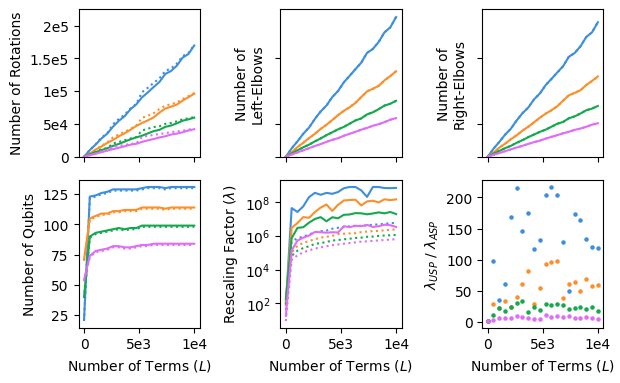

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(16 / 2.54, 10 / 2.54))


VALUE_OF_I = 15
VALUE_OF_B_PLUS_A = 5
for VALUE_OF_OMEGA, color in zip([15, 7, 3, 1], [BLUE, ORANGE, GREEN, PURPLE]):

    usp_dataframe = dataframe.loc[dataframe['circuit_types'] == "USP"]
    usp_dataframe = usp_dataframe.loc[usp_dataframe['numbers_of_modes'] == VALUE_OF_I]
    usp_dataframe = usp_dataframe.loc[usp_dataframe['maximum_lengths_of_terms'] == VALUE_OF_B_PLUS_A]
    usp_dataframe = usp_dataframe.loc[usp_dataframe['maximum_bosonic_occupations'] == VALUE_OF_OMEGA]

    asp_dataframe = dataframe.loc[dataframe['circuit_types'] == "ASP"]
    asp_dataframe = asp_dataframe.loc[asp_dataframe['numbers_of_modes'] == VALUE_OF_I]
    asp_dataframe = asp_dataframe.loc[asp_dataframe['maximum_lengths_of_terms'] == VALUE_OF_B_PLUS_A]
    asp_dataframe = asp_dataframe.loc[asp_dataframe['maximum_bosonic_occupations'] == VALUE_OF_OMEGA]


    axes[0][0].plot(usp_dataframe["numbers_of_terms"], usp_dataframe["nonclifford_rotation_counts"].tolist(), color=color)
    axes[0][0].plot(asp_dataframe["numbers_of_terms"], asp_dataframe["nonclifford_rotation_counts"].tolist(), color=color, ls=":")
    axes[0][0].set_ylim(0, 2.25e5)
    axes[0][0].set_yticks([0, 5e4, 1e5, 1.5e5, 2e5])
    axes[0][0].set_yticklabels(["0", "5e4", "1e5", "1.5e5", "2e5"])
    # usp_dataframe.plot(x="numbers_of_terms", y="nonclifford_rotation_counts", kind="line", ax=axes[0][0], legend=False, label="USP", color=color) 
    # asp_dataframe.plot(x="numbers_of_terms", y="nonclifford_rotation_counts", kind="line", ax=axes[0][0], legend=False, label="ASP", color=color, ls=":")

    axes[0][1].plot(usp_dataframe["numbers_of_terms"], usp_dataframe["left_elbow_counts"].tolist(), color=color)
    axes[0][1].plot(asp_dataframe["numbers_of_terms"], asp_dataframe["left_elbow_counts"].tolist(), color=color, ls=":")
    axes[0][1].set_ylim(0, 2.25e5)
    axes[0][1].set_yticks([0, 5e4, 1.5e5])
    axes[0][1].set_yticklabels([])
    # usp_dataframe.plot(x="numbers_of_terms", y="left_elbow_counts", kind="line", ax=axes[0][1], legend=False, label="USP", color=color) 
    # asp_dataframe.plot(x="numbers_of_terms", y="left_elbow_counts", kind="line", ax=axes[0][1], legend=False, label="ASP", color=color, ls=":") 

    axes[0][2].plot(usp_dataframe["numbers_of_terms"], usp_dataframe["right_elbow_counts"].tolist(), color=color)
    axes[0][2].plot(asp_dataframe["numbers_of_terms"], asp_dataframe["right_elbow_counts"].tolist(), color=color, ls=":")
    axes[0][2].set_ylim(0, 2.25e5)
    axes[0][2].set_yticks([0, 5e4, 1.5e5])
    axes[0][2].set_yticklabels([])
    # usp_dataframe.plot(x="numbers_of_terms", y="right_elbow_counts", kind="line", ax=axes[0][2], legend=False, label="USP", color=color) 
    # asp_dataframe.plot(x="numbers_of_terms", y="right_elbow_counts", kind="line", ax=axes[0][2], legend=False, label="ASP", color=color, ls=":") 


    axes[1][0].plot(usp_dataframe["numbers_of_terms"], usp_dataframe["numbers_of_qubits"].tolist(), color=color)
    axes[1][0].plot(asp_dataframe["numbers_of_terms"], asp_dataframe["numbers_of_qubits"].tolist(), color=color, ls=":")
    # usp_dataframe.plot(x="numbers_of_terms", y="numbers_of_qubits", kind="line", ax=axes[1][0], legend=False, label="USP", color=color) 
    # asp_dataframe.plot(x="numbers_of_terms", y="numbers_of_qubits", kind="line", ax=axes[1][0], legend=False, label="ASP", color=color, ls=":")

    axes[1][1].plot(usp_dataframe["numbers_of_terms"], usp_dataframe["rescaling_factors"].tolist(), color=color)
    axes[1][1].plot(asp_dataframe["numbers_of_terms"], asp_dataframe["rescaling_factors"].tolist(), color=color, ls=":")
    # usp_dataframe.plot(x="numbers_of_terms", y="rescaling_factors", kind="line", ax=axes[1][1], legend=False, label="USP", color=color) 
    # asp_dataframe.plot(x="numbers_of_terms", y="rescaling_factors", kind="line", ax=axes[1][1], legend=False, label="ASP", color=color, ls=":") 
    axes[1][1].set_yscale("log")

    rescaling_factor_ratios = np.array(usp_dataframe["rescaling_factors"].tolist()) / np.array(asp_dataframe["rescaling_factors"].tolist())
    axes[1][2].scatter(usp_dataframe["numbers_of_terms"], rescaling_factor_ratios, color=color, s=5)

# axes[0].text(-26500, 475, '(a)', fontsize = 10)
# axes[0][1].text(-5, -5, '(b)', fontsize = 10)
# axes[0][2].text(-5, -5, '(c)', fontsize = 10)
# axes[1][0].text(-5, -5, '(d)', fontsize = 10)
# axes[1][1].text(-5, -5, '(e)', fontsize = 10)
# axes[1][2].text(-5, -5, '(f)', fontsize = 10)


axes[0][0].set_xlabel(None)
axes[0][0].set_xticks([0, 5000, 10000])
axes[0][0].set_xticklabels([])
axes[0][1].set_xlabel(None)
axes[0][1].set_xticks([0, 5000, 10000])
axes[0][1].set_xticklabels([])
axes[0][2].set_xlabel(None)
axes[0][2].set_xticks([0, 5000, 10000])
axes[0][2].set_xticklabels([])
axes[1][0].set_xlabel("Number of Terms ($L$)")
axes[1][0].set_xticks([0, 5000, 10000])
axes[1][0].set_xticklabels([0, "5e3", "1e4"])
axes[1][1].set_xlabel("Number of Terms ($L$)")
axes[1][1].set_xticks([0, 5000, 10000])
axes[1][1].set_xticklabels([0, "5e3", "1e4"])
axes[1][2].set_xlabel("Number of Terms ($L$)")
axes[1][2].set_xticks([0, 5000, 10000])
axes[1][2].set_xticklabels([0, "5e3", "1e4"])

axes[0][0].set_ylabel("Number of Rotations")
axes[0][1].set_ylabel("Number of\nLeft-Elbows")
axes[0][2].set_ylabel("Number of\nRight-Elbows")
axes[1][0].set_ylabel("Number of Qubits")
axes[1][1].set_ylabel("Rescaling Factor ($\\lambda$)")
axes[1][2].set_ylabel("$\\lambda_{USP}$ / $\\lambda_{ASP}$")

plt.tight_layout()
plt.savefig("../manuscript/figures/random_hamiltonians_metrics_vs_terms.pdf", dpi=600)

# Plot Versus Increasing Omega

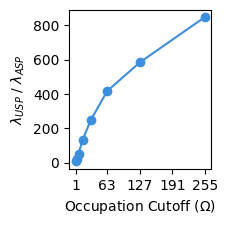

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(6 / 2.54, 6 / 2.54))

VALUE_OF_I = 15
VALUE_OF_B_PLUS_A = 5

OMEGA_VALUES = [255, 127, 63, 31, 15, 7, 3, 1]
average_rescaling_factor_ratios = []

for VALUE_OF_OMEGA in OMEGA_VALUES:

    usp_dataframe = dataframe.loc[dataframe['circuit_types'] == "USP"]
    usp_dataframe = usp_dataframe.loc[usp_dataframe['numbers_of_modes'] == VALUE_OF_I]
    usp_dataframe = usp_dataframe.loc[usp_dataframe['maximum_lengths_of_terms'] == VALUE_OF_B_PLUS_A]
    usp_dataframe = usp_dataframe.loc[usp_dataframe['maximum_bosonic_occupations'] == VALUE_OF_OMEGA]

    asp_dataframe = dataframe.loc[dataframe['circuit_types'] == "ASP"]
    asp_dataframe = asp_dataframe.loc[asp_dataframe['numbers_of_modes'] == VALUE_OF_I]
    asp_dataframe = asp_dataframe.loc[asp_dataframe['maximum_lengths_of_terms'] == VALUE_OF_B_PLUS_A]
    asp_dataframe = asp_dataframe.loc[asp_dataframe['maximum_bosonic_occupations'] == VALUE_OF_OMEGA]

    average_rescaling_factor_ratios.append(
        np.average(
            np.array(usp_dataframe["rescaling_factors"].tolist()) / np.array(asp_dataframe["rescaling_factors"].tolist())
        )
    )

axes.set_xticks([1, 63, 127, 191, 255])
axes.plot(OMEGA_VALUES, average_rescaling_factor_ratios, color=BLUE, marker="o")
axes.set_ylabel("$\\lambda_{USP}$ / $\\lambda_{ASP}$")
axes.set_xlabel("Occupation Cutoff ($\\Omega$)")
plt.tight_layout()
plt.savefig("../manuscript/figures/random_hamiltonians_rescaling_factor_ratios_vs_omega.pdf", dpi=600)

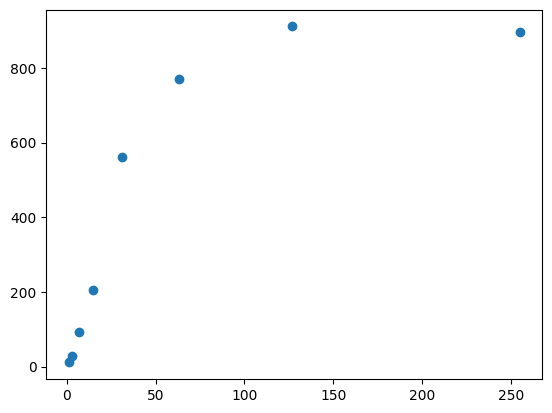

In [15]:
x_vals = usp_dataframe["maximum_bosonic_occupations"]
y_vals = np.array(usp_dataframe["rescaling_factors"].tolist()) / np.array(asp_dataframe["rescaling_factors"].tolist())
plt.scatter(x_vals, y_vals)

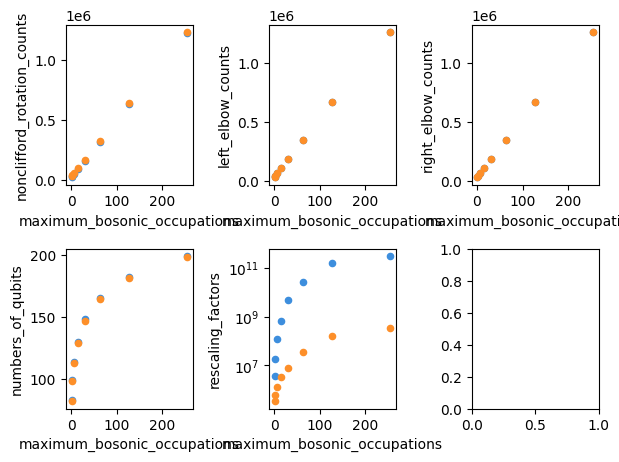

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(16 / 2.54, 12 / 2.54))


usp_dataframe.plot(x="maximum_bosonic_occupations", y="nonclifford_rotation_counts", kind="scatter", ax=axes[0][0], legend=False, label="USP", color=BLUE) 
asp_dataframe.plot(x="maximum_bosonic_occupations", y="nonclifford_rotation_counts", kind="scatter", ax=axes[0][0], legend=False, label="ASP", color=ORANGE)

usp_dataframe.plot(x="maximum_bosonic_occupations", y="left_elbow_counts", kind="scatter", ax=axes[0][1], legend=False, label="USP", color=BLUE) 
asp_dataframe.plot(x="maximum_bosonic_occupations", y="left_elbow_counts", kind="scatter", ax=axes[0][1], legend=False, label="ASP", color=ORANGE) 

usp_dataframe.plot(x="maximum_bosonic_occupations", y="right_elbow_counts", kind="scatter", ax=axes[0][2], legend=False, label="USP", color=BLUE) 
asp_dataframe.plot(x="maximum_bosonic_occupations", y="right_elbow_counts", kind="scatter", ax=axes[0][2], legend=False, label="ASP", color=ORANGE) 


usp_dataframe.plot(x="maximum_bosonic_occupations", y="numbers_of_qubits", kind="scatter", ax=axes[1][0], legend=False, label="USP", color=BLUE) 
asp_dataframe.plot(x="maximum_bosonic_occupations", y="numbers_of_qubits", kind="scatter", ax=axes[1][0], legend=False, label="ASP", color=ORANGE)

usp_dataframe.plot(x="maximum_bosonic_occupations", y="rescaling_factors", kind="scatter", ax=axes[1][1], legend=False, label="USP", color=BLUE) 
asp_dataframe.plot(x="maximum_bosonic_occupations", y="rescaling_factors", kind="scatter", ax=axes[1][1], legend=False, label="ASP", color=ORANGE) 
axes[1][1].set_yscale("log")


plt.tight_layout()